# Imports

In [383]:
import pandas as pd
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [384]:
df=pd.read_csv('LinkedIn Job Data.csv')

In [385]:
df.sample(5)

,Job ID,Date,Company Name,Post,Location,Description,Level,Type,Function,Industry
5,2163179706,2020-09-15,REF- Recursos Humanos,GERENTE DE SEGURANÇA DO TRABALHO,"Belo Horizonte, Minas Gerais, Brazil",ADMITE PARA SUA SEDE EM BELO HORIZONTE-MINAS G...,Associate,Full-time,OtherInformation TechnologyManagement,Information Technology and ServicesStaffing an...
2,2162603812,2020-09-14,Vale,ENGENHEIRO PLENO – PLANEJAMENTO – MINERAÇÃO,"Nova Lima, Minas Gerais, Brazil",Atenção: é necessário anexar seu currículo no ...,Entry level,Full-time,EngineeringInformation Technology,Information Technology and ServicesStaffing an...
542,2016777976,2020-08-27,The Church of Jesus Christ of Latter-day Saints,Supervisor de Manutenção - Manaus,Greater Manaus,Purposes\n\nO departamento de Manutenção da ig...,Mid-Senior level,Full-time,ManagementManufacturing,Religious InstitutionsNonprofit Organization M...
290,2019651673,2020-09-03,Paula Pedrosa Headhunter &amp; HR Solutions,Coordenador da Qualidade – Manaus/AM,Greater Manaus,Responsável pelos processos de manufatura;\nIm...,Associate,Full-time,Other,Electrical/Electronic ManufacturingAviation & ...
347,2004870905,2020-09-15,GE Aviation,Business Development Intern,"Rio de Janeiro, Brazil",Role Summary:\nAcompanhar todas as atividades ...,Internship,Full-time,EducationTraining,Airlines/AviationAviation & Aerospace


# Data Featuring

## Location

In [391]:
df3=pd.DataFrame()

In [392]:
def estado(location):
    lst=location.split(',')
    try: return lst[1].strip()
    except IndexError: return lst[-1].strip()

df3['Location']=df['Location'].apply(estado)

In [393]:
df3['Location']=df3['Location'].str.replace('Greater Belo Horizonte','Minas Gerais') \
.replace('Greater Sao Paulo','São Paulo').replace('Greater Salvador','Nordeste') \
.replace('Greater Curitiba','Sul').replace('Greater Manaus','Norte').replace('Greater Rio de Janeiro','Rio de Janeiro') \
.replace('Brazil','NA').replace('Brazil Metropolitan Area','NA').replace('Paraiba','Paraíba')

[Text(0, 0, 'São Paulo'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Paraná'),
 Text(0, 0, 'Rio Grande do Sul'),
 Text(0, 0, 'Rio de Janeiro'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Bahia')]

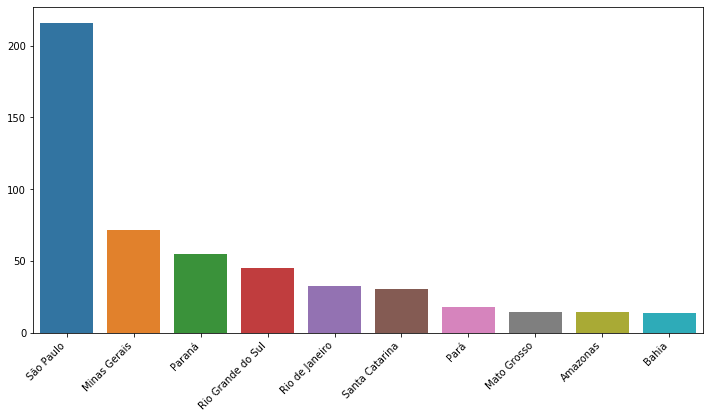

In [403]:
# 10 estados com mais vagas
plt.subplots(figsize=(12,6))
aux=df3['Location'].value_counts()[0:10]
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [404]:
Nordeste=['Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia']
Sul=['Paraná','Santa Catarina','Rio Grande do Sul']
Norte=['Amazonas','Pará','Tocantins','Rondônia','Acre','Amapá','Roraima']
Centro_Oeste=['Mato Grosso','Mato Grosso do Sul','Goiás','Distrito Federal','Federal District']
Sudeste=['Minas Gerais','Rio de Janeiro','Espírito Santo','São Paulo']

df3['Location']=df3['Location'].apply(lambda x: 'Nordeste' if x in Nordeste else x)
df3['Location']=df3['Location'].apply(lambda x: 'Sul' if x in Sul else x)
df3['Location']=df3['Location'].apply(lambda x: 'Norte' if x in Norte else x)
df3['Location']=df3['Location'].apply(lambda x: 'Centro_Oeste' if x in Centro_Oeste else x)
df3['Location']=df3['Location'].apply(lambda x: 'Sudeste' if x in Sudeste else x)

[Text(0, 0, 'Sudeste'),
 Text(0, 0, 'Sul'),
 Text(0, 0, 'Nordeste'),
 Text(0, 0, 'Centro_Oeste'),
 Text(0, 0, 'Norte')]

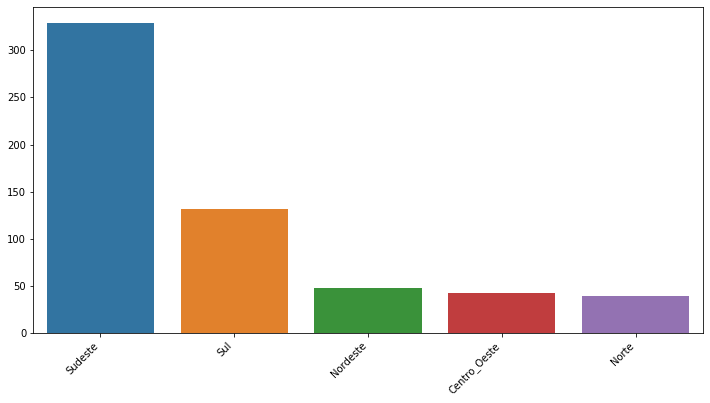

In [408]:
# Distribuição de vagas nos estados
plt.subplots(figsize=(12,6))
aux=df3['Location'].value_counts()[0:5]
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Function

In [363]:
df2=pd.DataFrame()

In [364]:
df2['Project Management']=df['Function'].apply(lambda x: 1 if 'Project Management' in x else 0)
df2['Engineering']=df['Function'].apply(lambda x: 1 if 'Engineering' in x else 0)
df2['Information Technology']=df['Function'].apply(lambda x: 1 if 'Information Technology' in x else 0)
df2['Management']=df['Function'].apply(lambda x: 1 if 'Management' in x else 0)
df2['Education']=df['Function'].apply(lambda x: 1 if 'Education' in x else 0)
df2['Other']=df['Function'].apply(lambda x: 1 if 'Other' in x else 0)
df2['Business Development']=df['Function'].apply(lambda x: 1 if 'Business Development' in x else 0)
df2['Sales']=df['Function'].apply(lambda x: 1 if 'Sales' in x else 0)
df2['Quality Assurance']=df['Function'].apply(lambda x: 1 if 'Quality Assurance' in x else 0)
df2['Administrative']=df['Function'].apply(lambda x: 1 if 'Administrative' in x else 0)
df2['DesignArt/Creative']=df['Function'].apply(lambda x: 1 if 'DesignArt/Creative' in x else 0)
df2['Purchasing']=df['Function'].apply(lambda x: 1 if 'Purchasing' in x else 0)
df2['Supply Chain']=df['Function'].apply(lambda x: 1 if 'Supply Chain' in x else 0)
df2['Manufacturing']=df['Function'].apply(lambda x: 1 if 'Manufacturing' in x else 0)
df2['Production']=df['Function'].apply(lambda x: 1 if 'Production' in x else 0)
df2['Research']=df['Function'].apply(lambda x: 1 if 'Research' in x else 0)
df2['Management']=df['Function'].apply(lambda x: 1 if (('Management' in x) and ('Project' not in x)) else 0)
df2['Analyst']=df['Function'].apply(lambda x: 1 if 'Analyst' in x else 0)

[Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Engineering'),
 Text(0, 0, 'Management'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Business Development'),
 Text(0, 0, 'Quality Assurance'),
 Text(0, 0, 'Project Management'),
 Text(0, 0, 'Administrative'),
 Text(0, 0, 'DesignArt/Creative'),
 Text(0, 0, 'Supply Chain'),
 Text(0, 0, 'Purchasing'),
 Text(0, 0, 'Production'),
 Text(0, 0, 'Analyst'),
 Text(0, 0, 'Research')]

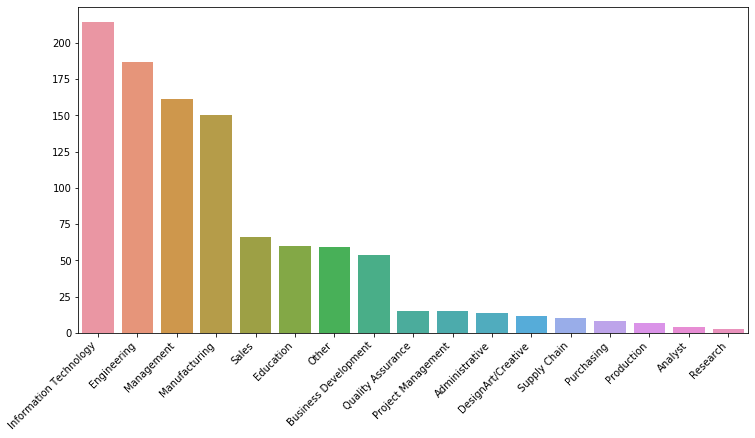

In [365]:
plt.subplots(figsize=(12,6))
aux=df2.sum().sort_values(ascending=False)
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [113]:
# plt.subplots(figsize=(20,15))
# sns.heatmap(df.corr(),annot=True)

## Industry

In [329]:
df1=pd.DataFrame()

In [330]:
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Information Technology and Services' in x else 0)
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Staffing and Recruiting' in x else 0)
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Human Resources' in x else 0)

df1['Food Production']=df['Industry'].apply(lambda x: True if 'Food & Beverages' in x else 0)
df1['Food Production']=df['Industry'].apply(lambda x: True if 'Food Production' in x else 0)

df1['Mechanical or Industrial Engineering']=df['Industry'].apply(lambda x: True if 'Mechanical or Industrial Engineering' in x else 0)

df1['Management Consulting']=df['Industry'].apply(lambda x: True if 'Management Consulting' in x else 0)

df1['Civil Engineering']=df['Industry'].apply(lambda x: True if 'Civil Engineering' in x else 0)
df1['Civil Engineering']=df['Industry'].apply(lambda x: True if 'Construction' in x else 0)

df1['Industrial Automation']=df['Industry'].apply(lambda x: True if 'Industrial Automation' in x else 0)
df1['Electrical/Electronic Manufacturing']=df['Industry'].apply(lambda x: True if 'Electrical/Electronic Manufacturing' in x else 0)
df1['Mining & Metals']=df['Industry'].apply(lambda x: True if 'Mining & Metals' in x else 0)
df1['Automotive']=df['Industry'].apply(lambda x: True if 'Automotive' in x else 0)
df1['Airlines/AviationAviation & Aerospace']=df['Industry'].apply(lambda x: True if 'Airlines/AviationAviation & Aerospace' in x else 0)
df1['Paper & Forest Products']=df['Industry'].apply(lambda x: True if 'Paper & Forest Products' in x else 0)
df1['Renewables & Environment']=df['Industry'].apply(lambda x: True if 'Renewables & Environment' in x else 0)
df1['Oil & Energy']=df['Industry'].apply(lambda x: True if 'Oil & Energy' in x else 0)


[Text(0, 0, 'Staffing and Recruiting'),
 Text(0, 0, 'Mechanical or Industrial Engineering'),
 Text(0, 0, 'Electrical/Electronic Manufacturing'),
 Text(0, 0, 'Civil Engineering'),
 Text(0, 0, 'Management Consulting'),
 Text(0, 0, 'Industrial Automation'),
 Text(0, 0, 'Renewables & Environment'),
 Text(0, 0, 'Food Production'),
 Text(0, 0, 'Oil & Energy'),
 Text(0, 0, 'Automotive'),
 Text(0, 0, 'Mining & Metals'),
 Text(0, 0, 'Paper & Forest Products'),
 Text(0, 0, 'Airlines/AviationAviation & Aerospace')]

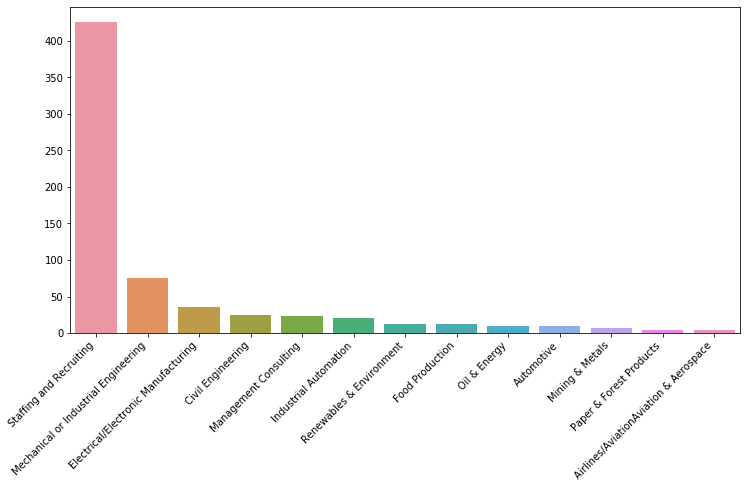

In [362]:
plt.subplots(figsize=(12,6))
aux=df1.sum().sort_values(ascending=False)
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Description

In [279]:
df['description_length'] = df['Description'].apply(len)

In [ ]:
df['description_length'].describe()

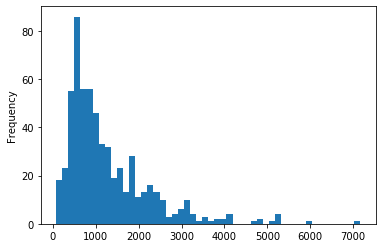

In [282]:
# Distribuição do número de caracteres da descrição da vaga
df['description_length'].plot(bins=50, kind='hist') 

In [283]:
import string

In [285]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

substituir - / por espaço
tirar pontuação, incluindo parenteses
tirar (a)

In [290]:
df.sample(10)

,Job ID,Date,Company Name,Post,Location,Description,Level,Type,Function,Industry,length
594,2021440488,2020-09-06,KLL EQUIPAMENTOS PARA TRANSPORTE SA,Desenhista Projetista Pleno,Sul,Vaga de Desenhista Projetista Pleno em Rio Gra...,Entry level,Full-time,DesignArt/CreativeInformation Technology,Civil EngineeringMechanical or Industrial Engi...,736
382,2016415382,2020-08-23,GD9 Consultoria em Recursos Humanos,Assistente de Engenharia - Araucária,Sul,"Atender clientes internos via telefone, e-mail...",Entry level,Full-time,EngineeringInformation Technology,Information Technology and ServicesStaffing an...,1011
329,2160137593,2020-09-09,Thomas Técnica Coml. Elementos de Transmissão ...,Representante Comercial,Minas Gerais,"Empresade atuação no mercado, busca representa...",Entry level,Full-time,SalesManagement,Civil EngineeringHigher EducationMechanical or...,435
447,2002995765,2020-08-21,Liebherr Brasil Indústria e Comércio de Máquin...,ENGENHEIRO DE SISTEMAS,São Paulo,Sistemas Autônomos - Engenharia de Produto / M...,Entry level,Full-time,Information Technology,Electrical/Electronic ManufacturingCivil Engin...,1071
95,2008184285,2020-07-31,ISS Brasil,Estagiário de Projetos e Processos,Minas Gerais,"A ISS é feita de pessoas talentosas, competent...",Internship,Full-time,EducationTraining,Consumer Services,1291
113,2023707386,2020-09-11,Delta Electronics Brasil,Projetista mecânico,São Paulo,Direct message the job poster from Delta Elect...,Mid-Senior level,Full-time,EngineeringInformation Technology,Electrical/Electronic Manufacturing,115
184,2163177525,2020-09-15,RH Brasil - Campinas,TECNICO DE PRODUCAO,São Paulo,Requisitos: Técnico completo em Mecânico ou Pl...,Entry level,Full-time,ManagementManufacturing,Food & BeveragesStaffing and RecruitingHuman R...,981
491,2020103937,2020-09-04,LCS - Tecnologia Integrada ao seu Negócio,Assistente De Compras - Ribeirão Preto/ SP,São Paulo,Vaga de Assistente De Compras\nRibeirão Preto/...,Entry level,Full-time,ManagementManufacturing,Staffing and RecruitingTelecommunicationsHuman...,1242
493,2019165297,2020-09-03,Jasmine Alimentos,Programador de Manutenção,Sul,Job Description\n\nVocê já imaginou trabalhar ...,Entry level,Full-time,EngineeringInformation Technology,Information Technology and ServicesStaffing an...,3081
570,2160909416,2020-09-12,EngenhariaJob,Projetista Mecânico - Ipatinga,Minas Gerais,Job Description\n\nElaborar entregáveis da dis...,Entry level,Full-time,EngineeringInformation Technology,Information Technology and ServicesStaffing an...,536


In [291]:
stopwords = open('stopwords_pt.txt', encoding='utf-8-sig', mode='r').read()

In [293]:
stopwords=stopwords.split('\n')

In [297]:
stopwords[0:10] ##show some stopwords

['a',
 'acerca',
 'adeus',
 'agora',
 'ainda',
 'alem',
 'algmas',
 'algo',
 'algumas',
 'alguns']